### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Content

Part 1 exercise data  with new dataset

part 2 new visualization



### Part 1 exercise data  with new dataset

In [6]:
### Begin Assignment Here


In [7]:
# 環境設定 Environment setup (Phase 1)
import pandas as pd
import numpy as np
from pathlib import Path

import nltk
nltk.download('punkt', quiet=True)

from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import matplotlib.pyplot as plt
import math

RANDOM_STATE = 42
pd.set_option('display.max_colwidth', 120)


In [8]:
# 讀取資料（相對路徑） Load dataset (relative path)
data_path = Path('newdataset') / 'Reddit-stock-sentiment.csv'
Data_path = data_path  # alias (original variable name)
df = pd.read_csv(data_path, encoding='utf-8')
df.head()


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,"Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history",Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and ...,Btankersly66,https://apnews.com/article/trump-truth-social-djt-tesla-musk-tariffs-pause-fccfa6b06c8f1ec0cd7844641ca52669,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comments/165kllm/who_knows_more_vmar/,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has ac...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', 'Marine', 'Main', 'Systems', 'Vision Marine Technologies Inc.', 'Visio...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping to call Trump quickly.,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/trump-xi-china-tariffs/index.html,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


### Exercise 1

In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [9]:
# 練習 1：印出前三筆文字資料 Exercise 1: print first three text samples
for i in range(3):
    print(f'(for example {i+1})')
    print('label:', df.loc[i, 'label'])
    print(df.loc[i, 'text'])
    print()


(for example 1)
label: -1.0
Calls on retards

(for example 2)
label: 0.0
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

(for example 3)
label: 0.0
Seeing lots of red in the ticker.



### Exercise 2 


In [ ]:
# 練習 2：pandas 查詢練習 Exercise 2: pandas querying practice

# 建立 Phase 1 的清理後資料表 Create a cleaned working dataframe for Phase 1
df_work = df[['datetime', 'subreddit', 'title', 'text', 'label', 'polarity', 'subjectivity']].copy()
df_work['datetime'] = pd.to_datetime(df_work['datetime'], errors='coerce')
df_work['label'] = pd.to_numeric(df_work['label'], errors='coerce')
df_work['text'] = df_work['text'].fillna('').astype(str)
df_work = df_work[df_work['text'].str.strip().ne('')].dropna(subset=['label']).reset_index(drop=True)

print('shape:', df_work.shape)
print('label distribution:')
display(df_work['label'].value_counts(dropna=False))

# 使用 iloc：依位置取值 iloc: select by position
display(df_work.iloc[:3])

# 使用 loc：用條件過濾 loc: boolean filtering
display(df_work.loc[df_work['label'] == 1.0, ['label', 'subreddit', 'text']].head(3))


display(df_work.query('label == -1.0')[['label', 'subreddit', 'text']].head(3))

# 文字包含搜尋 string contains
display(df_work[df_work['text'].str.contains('stock', case=False, na=False)].head(3))

# 隨機抽樣 sample
display(df_work.sample(3, random_state=RANDOM_STATE))


shape: (847, 7)
label distribution:


label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64

,datetime,subreddit,title,text,label,polarity,subjectivity
0,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,-0.900000,1.000000
1,2025-04-12 01:12:19,wallstreetbets,"Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history",Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...,0.0,0.083333,0.177778
2,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and ...,Seeing lots of red in the ticker.,0.0,0.000000,0.000000


,label,subreddit,text
3,1.0,stockstobuytoday,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has ac...
8,1.0,stocks,Am I the only one seeing the cup & handle breakout here? 52 week high? Third Green Day? The pivot was on Thursday. P...
9,1.0,stockstobuytoday,HLGN is $10. Hurry and catch it now before it shoots to the moon!


,label,subreddit,text
0,-1.0,wallstreetbets,Calls on retards
4,-1.0,StockMarket,He didn’t say thank you.
6,-1.0,stocks,Trump will respond to china increasing their tariffs. Trump is looking to fire Jerome Powell. Earnings reporting is ...


,datetime,subreddit,title,text,label,polarity,subjectivity
48,2025-04-02 13:00:42,stockstobuytoday,Earnings for current week,\r\n\r\n [MarketWatch: Stock Market News - Financial News - Earmings Stonkvest (stockbuyvest.com)]() \r\n\r\n\#cata...,0.0,0.000000,0.000000
63,2025-03-01 10:00:42,stocks,Rate My Portfolio - r/Stocks Quarterly Thread March 2025,"Please use this thread to discuss your portfolio, learn of other stock tickers & portfolios like [Warren Buffet's](/...",0.0,0.176667,0.368030
72,2025-04-04 06:25:04,stockstobuytoday,Spending first $250 tmmw on stocks,"A lot of stocks are down right now, and I'm thinking of spending 250 on the below tmmw. Thoughts (some are partial c...",0.0,0.005102,0.347959


,datetime,subreddit,title,text,label,polarity,subjectivity
457,2025-04-11 15:42:58,StockMarket,Trump: We Are Doing Really Well On Our Tariff Policy.,"""We"" who?",0.0,0.0,0.00
342,2025-04-12 03:04:05,wallstreetbets,"Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history",Chicken jockey,0.0,-0.6,0.95
280,2025-04-10 14:40:26,StockMarket,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and ...,Not great Bob,-1.0,0.8,0.75


### Exercise 3

In [11]:

# 目標：抓特定 subreddit 的資料，每 10 筆取 1 筆，只顯示前 5 筆
# Goal: filter one subreddit, take every 10th row, show first 5

target_subreddit = "StockMarket"  # 你也可以改成 "wallstreetbets" 等
df_sub = df_work.loc[df_work["subreddit"] == target_subreddit, ["datetime", "subreddit", "label", "text"]].reset_index(drop=True)

# every 10th record -> 0,10,20,... then head(5)
display(df_sub.iloc[::10].head(5))


,datetime,subreddit,label,text
0,2025-04-10 15:09:41,StockMarket,0.0,Seeing lots of red in the ticker.
10,2025-04-11 16:11:48,StockMarket,-1.0,Comedy gold :))
20,2025-04-11 15:15:20,StockMarket,0.0,I can’t take four years of lying. Help!
30,2025-04-11 10:04:54,StockMarket,0.0,\r\nAn evil man will burn his own nation to the ground to rule over the ashes. Sun Tzu
40,2025-04-11 14:46:24,StockMarket,-1.0,He reached this level only because of his inheritance. He consistently ruins everything he touches. The only reason ...


### EX4

In [12]:

# 目標:按列(row/record)算每筆缺值數
# Goal: count missing values per record (row) instead of per column


# 每筆缺值數 / missing count per row
missing_per_row = df_work.isna().sum(axis=1)

# 把結果加回表，方便觀察 / attach to dataframe
df_work["missing_count"] = missing_per_row

print("missing_count value counts:")
display(df_work["missing_count"].value_counts().sort_index())

# 顯示缺值最多的前 5 筆 / show top 5 rows with most missing
display(df_work.sort_values("missing_count", ascending=False).head(5)[
    ["datetime", "subreddit", "label", "missing_count", "text"]
])


missing_count value counts:


missing_count
0    847
Name: count, dtype: int64

,datetime,subreddit,label,missing_count,text
846,2025-04-12 03:09:06,wallstreetbets,0.0,0,![img](emote|t5_2th52|31224)
0,2025-04-11 17:29:56,wallstreetbets,-1.0,0,Calls on retards
1,2025-04-12 01:12:19,wallstreetbets,0.0,0,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...
2,2025-04-10 15:09:41,StockMarket,0.0,0,Seeing lots of red in the ticker.
3,2023-08-30 17:12:55,stockstobuytoday,1.0,0,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has ac...


### 4.2 重複值處理 Dealing with Duplicate Data

In [13]:

# 目標：檢查重複列並去除（以 text 為主，避免同一篇內容重複）
# Goal: check and remove duplicates (based on text to avoid duplicated content)

print("Before:", df_work.shape)

# 1) 檢查整列重複 / check full-row duplicates
full_dup_count = df_work.duplicated().sum()
print("Full-row duplicates:", full_dup_count)

# 2) 檢查 text 重複 / check duplicates by text
text_dup_count = df_work.duplicated(subset=["text"]).sum()
print("Text duplicates:", text_dup_count)

# 3) 去除 text 重複（保留第一筆）/ drop duplicates by text (keep first)
df_work = df_work.drop_duplicates(subset=["text"], keep="first").reset_index(drop=True)

print("After:", df_work.shape)


Before: (847, 8)
Full-row duplicates: 0
Text duplicates: 23
After: (824, 8)


### 5.1

抽樣 200 筆 Sampling 200 records


In [14]:
n =200
df_sample = df_work.sample(n=n, random_state=RANDOM_STATE).reset_index(drop=True)
sample = df_work.sample(n=n, random_state=RANDOM_STATE).reset_index(drop=True)
print(df_work.shape, df_sample.shape)


(824, 8) (200, 8)



### 抽樣分佈比較subredditCompare distribution 

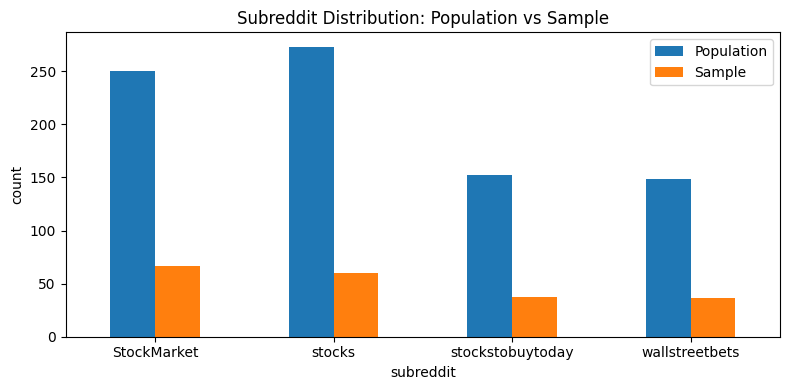

In [15]:
import matplotlib.pyplot as plt


population_count = df_work["subreddit"].value_counts()
sample_count = df_sample["subreddit"].value_counts()

count_compare = pd.DataFrame({
    "Population": population_count,
    "Sample": sample_count
}).fillna(0)

ax = count_compare.plot(kind="bar", figsize=(8,4), rot=0)
ax.set_title("Subreddit Distribution: Population vs Sample")
ax.set_xlabel("subreddit")
ax.set_ylabel("count")
plt.tight_layout()
plt.show()

Feature Creation

In [16]:
import nltk
nltk.download("punkt", quiet=True)

# HW 5.2：建立 unigrams 欄位（對應 Master 5.2）
df_work["unigrams"] = df_work["text"].fillna("").astype(str).apply(nltk.word_tokenize)

display(df_work.loc[:3, ["text", "unigrams"]])
print(list(df_work.loc[0:0, "unigrams"]))


,text,unigrams
0,Calls on retards,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...,"[Stunt, as, in, like, why, did, they, even, make, a, big, deal, about, starting, it, in, the, first, place, ?, No, c..."
2,Seeing lots of red in the ticker.,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has ac...,"[Vision, Marine, Technologies, Inc., is, rewriting, the, watercraft, rulebook, ., Their, collaboration, with, Shaun,..."


[['Calls', 'on', 'retards']]


##　5.3 Feature subset selection

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer：學 vocabulary 並產生文件-詞矩陣
# Goal: learn vocabulary and return document-term matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_work["text"].fillna("").astype(str))

print(X_counts[0])  # 第一筆文件的稀疏向量表示



  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


### EXERCISE 9

In [18]:
#Analyze the first record with build_analyzer(
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_work["text"].fillna("").astype(str))

analyze = count_vect.build_analyzer()

first_rec = df_work.loc[0, "text"]
tokens = analyze(first_rec)
tokens

['calls', 'on', 'retards']

In [19]:
X_counts[0:5, 0:100
         ].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### Exercise 10

In [20]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [21]:

# 目標：在文件的前 20 個詞向量中，找出第 2 個非 0 的詞
# Goal: find the 2nd non-zero entry in the first 20 terms of a document vector, then map back to the word

# 先用 CountVectorizer 建立 X_counts（不要加 stop_words，盡量貼近 Master）
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_work["text"].fillna("").astype(str))

# 第 5 篇文件（index=4）
row5 = X_counts[4].toarray().ravel()
non0 = np.nonzero(row5)[0]

print("non-zero positions:", non0)

if len(non0) < 2:
    print("第 5 筆文件非 0 少於 2 個，無法找到第 2 個非 0。")
else:
    vocab = count_vect.get_feature_names_out()
    second_idx = non0[1]
    print("2nd non-zero position:", second_idx)
    print("word:", vocab[second_idx])
    print("words in doc5:", vocab[non0])


non-zero positions: [1169 1846 3349 3844 4333]
2nd non-zero position: 1846
word: he
words in doc5: ['didn' 'he' 'say' 'thank' 'you']


畫HEAT MAP


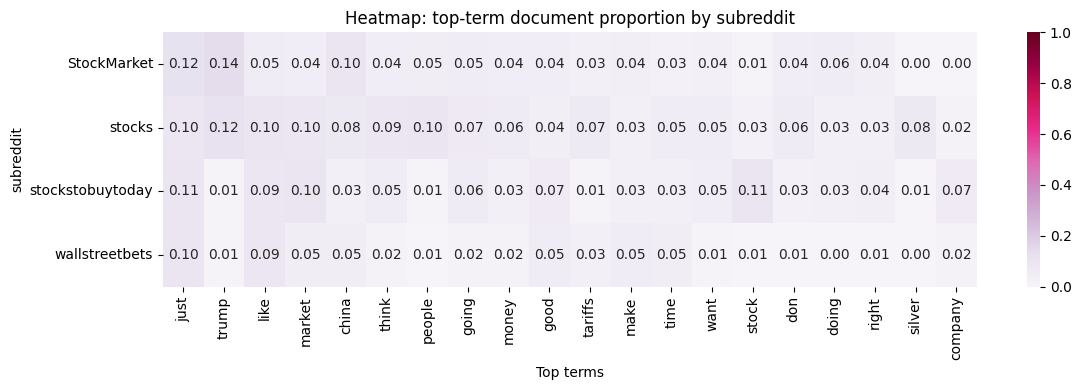

In [22]:

import seaborn as sns


# Heatmap (HW): subreddit (Y) x top terms (X)
#X=高頻詞，Y=subreddit
#  X=top frequent terms, Y=subreddit

K = 20  # top K terms on X-axis

# 1) 建 BoW / build BoW
count_vect = CountVectorizer(stop_words="english", lowercase=True)
X_counts = count_vect.fit_transform(df_work["text"].fillna("").astype(str))
vocab = np.array(count_vect.get_feature_names_out())

# 2) 選 top K/ select top K by term frequency
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
top_idx = np.argsort(term_frequencies)[::-1][:K]
top_terms = vocab[top_idx]

# 3) 對每個 subreddit 算「包含該詞的文件比例」/ per-subreddit document proportion
subreddits = sorted(df_work["subreddit"].dropna().unique().tolist())
plot_z = []

for sub in subreddits:
    mask = (df_work["subreddit"] == sub).to_numpy()
    X_sub = X_counts[mask][:, top_idx]           # docs_in_sub x K
    prop = np.asarray((X_sub > 0).mean(axis=0)).ravel()  # proportion in [0,1]
    plot_z.append(prop)

plot_x = top_terms.tolist()
plot_y = subreddits

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# 4) 畫 heatmap / draw heatmap
plt.subplots(figsize=(12, 4))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True, fmt=".2f")
ax.set_title("Heatmap: top-term document proportion by subreddit")
ax.set_xlabel("Top terms")
ax.set_ylabel("subreddit")
plt.tight_layout()
plt.show()



### 5.4.1 term-document matrix

In [23]:
# 5.4.1 Transform Text Data（HW）：term frequencies
# 前提：你前面已經有 count_vect, X_counts

vocab = count_vect.get_feature_names_out()
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

top_idx = np.argsort(term_frequencies)[::-1]
top_terms = pd.DataFrame({
    "term": np.array(vocab)[top_idx],
    "tf": term_frequencies[top_idx],
})

display(top_terms.head(20))


,term,tf
0,just,95
1,trump,92
2,like,83
3,market,82
4,china,72
5,think,52
6,people,51
7,going,50
8,money,46
9,good,46


畫TF最高的前五十個單字的HISTOGRAM DRAW THE ＨＩＳＴＯＧＲＡＭ　ｏｆ　ＴＯＰ　50

C:\Users\81203\AppData\Local\Temp\ipykernel_47568\548431589.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(terms, rotation=90)


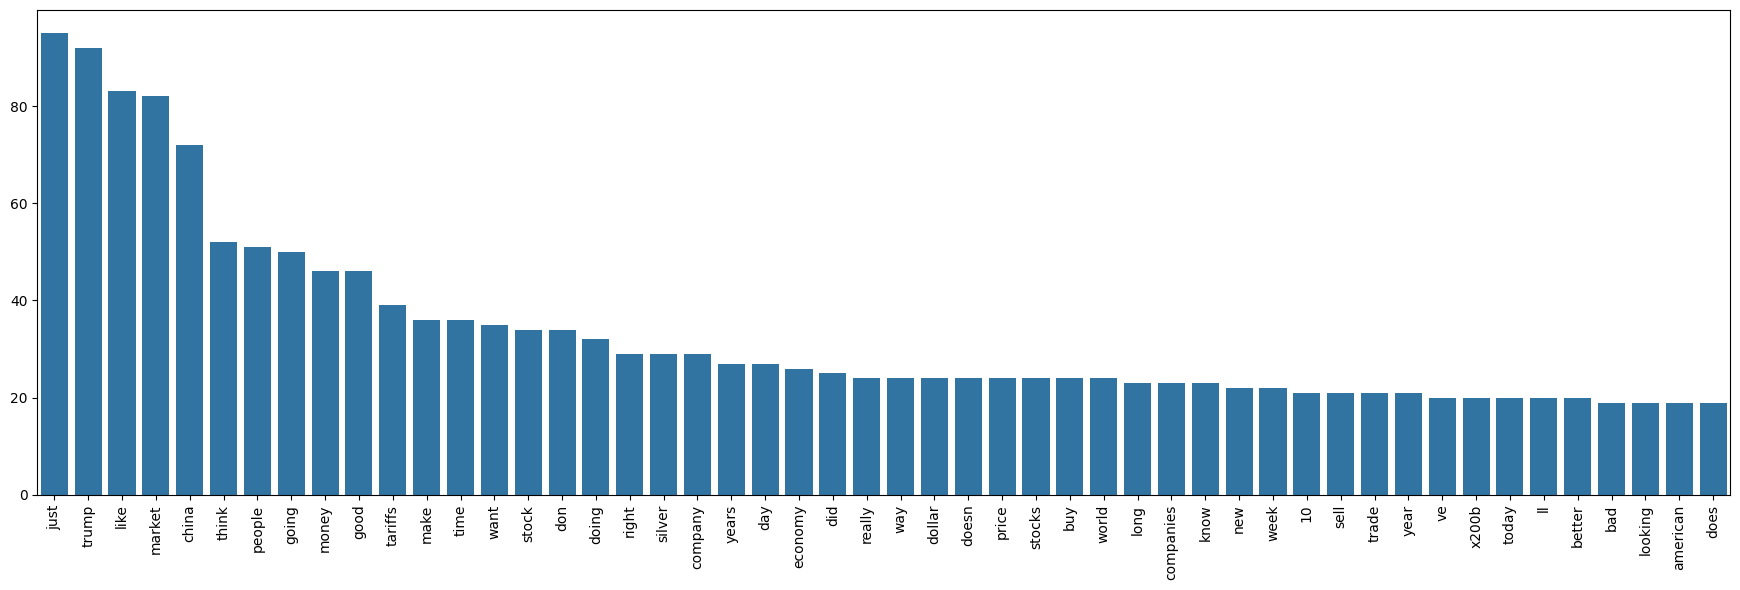

In [24]:


top_n = 50 
idx = np.argsort(term_frequencies)[::-1][:top_n]
terms = np.array(count_vect.get_feature_names_out())[idx]
tfs = term_frequencies[idx]

plt.subplots(figsize=(max(12, top_n*0.35), 6))
g = sns.barplot(x=terms, y=tfs)
g.set_xticklabels(terms, rotation=90)
plt.tight_layout()
plt.show()


### EXERCISE 12

C:\Users\81203\AppData\Local\Temp\ipykernel_47568\233050082.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(terms, rotation=90)


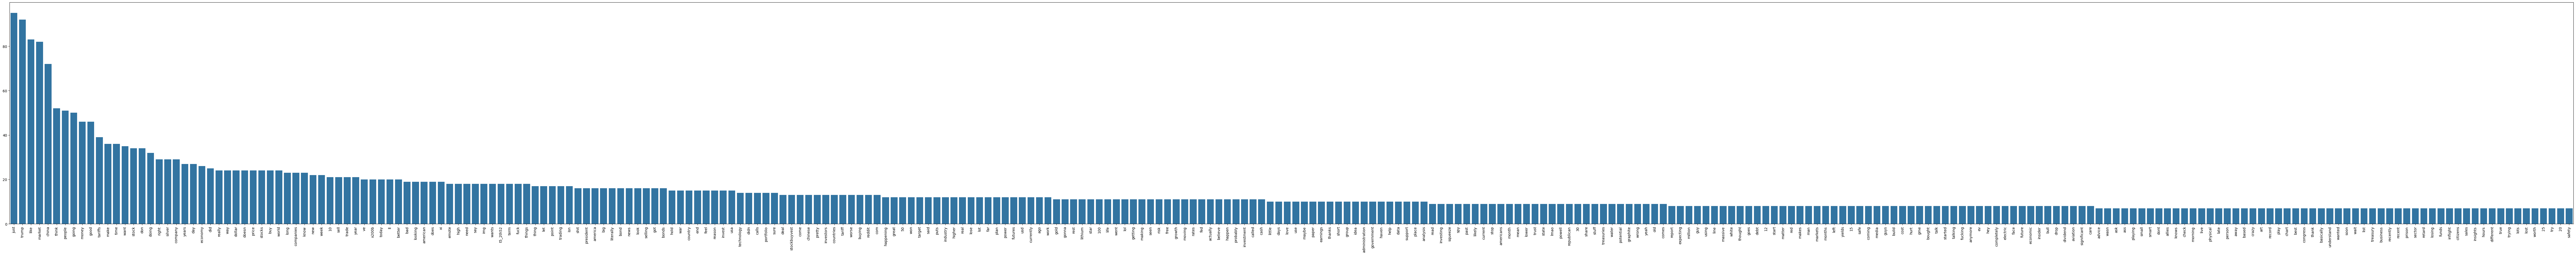

In [25]:
# Exercise 12（HW）: barplot of term frequencies (first 300 terms)
# 練習 12：畫出前 300 個詞的出現次數長條圖
# Note: this follows Master style 


top_n = 300
idx = np.argsort(term_frequencies)[::-1][:top_n]
terms = np.array(count_vect.get_feature_names_out())[idx]
tfs = term_frequencies[idx]

plt.figure(figsize=(100, 10))  # 跟 Master 類似的超寬圖
ax = sns.barplot(x=terms, y=tfs)
ax.set_xticklabels(terms, rotation=90)
plt.tight_layout()
plt.show()



### Exercise 13

C:\Users\81203\AppData\Local\Temp\ipykernel_47568\2914886641.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(filtered_terms[idx], rotation=90)


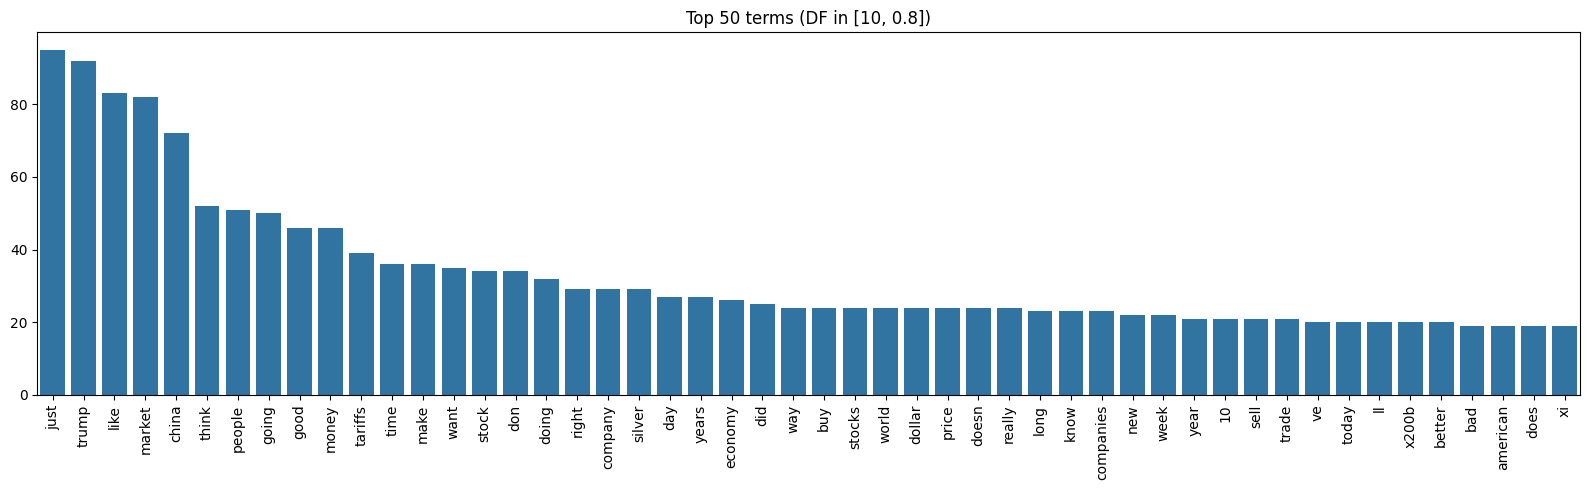

In [26]:
# Efficiently reduce the number of terms to visualize
# 有效率地減少要視覺化的詞數，先做特徵篩選，再畫 Top-N


# 1) 準備詞彙表與 DF（Document Frequency：每個詞出現在幾篇文件）
# 1) Prepare vocabulary and DF (Document Frequency: in how many docs a term appears)
vocab = np.array(count_vect.get_feature_names_out())
dfreq = np.asarray((X_counts > 0).sum(axis=0)).ravel()  # DF per term

# 2) 設定 DF 篩選門檻：移除太稀有/太常見的詞
# 2) Set DF thresholds: remove too-rare / too-common terms
min_df_docs = 10          # 至少出現在 10 篇文件 / appears in at least 10 docs
max_df_ratio = 0.8        # 出現在超過 80% 文件視為太常見 / too common if appears in >80% docs

# 保留符合門檻的詞索引 / keep indices that pass thresholds
keep = np.where(
    (dfreq >= min_df_docs) &
    (dfreq <= max_df_ratio * X_counts.shape[0])
)[0]

# 3) 在篩選後的詞裡，用 TF（Term Frequency：全資料出現總次數）排序取 Top-N
# 3) Among kept terms, rank by TF (total counts) and take Top-N
filtered_tf = term_frequencies[keep]
filtered_terms = vocab[keep]

top_n = 50
idx = np.argsort(filtered_tf)[::-1][:top_n]  # indices within filtered arrays

# 4) 畫圖：只畫篩選後的 Top-N
# 4) Plot: visualize only filtered Top-N for efficiency and readability
plt.figure(figsize=(16, 5))
ax = sns.barplot(x=filtered_terms[idx], y=filtered_tf[idx])
ax.set_xticklabels(filtered_terms[idx], rotation=90)
ax.set_title(f"Top {top_n} terms (DF in [{min_df_docs}, {max_df_ratio:.1f}])")
plt.tight_layout()
plt.show()


### 14 sort by frequency

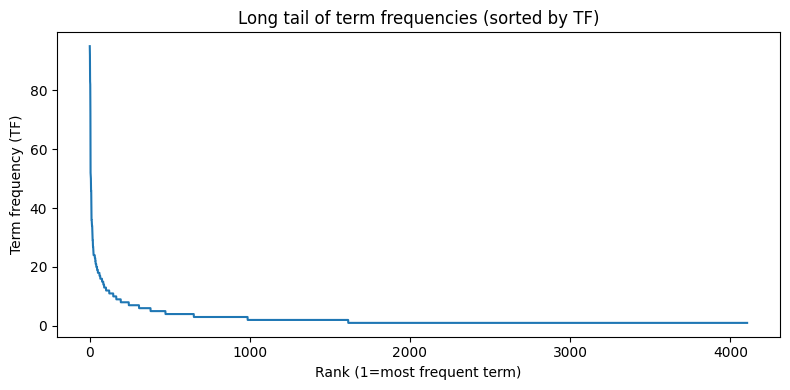

In [27]:
#sort x-axis terms by frequency to observe long tail
import numpy as np
import matplotlib.pyplot as plt

vocab = np.array(count_vect.get_feature_names_out())

# 1) 依 TF 由大到小排序 / sort by term frequency (descending)
idx = np.argsort(term_frequencies)[::-1]
tf_sorted = term_frequencies[idx]
terms_sorted = vocab[idx]

# 2) 畫長尾
# Plot long tail using rank on x-axis (more readable than plotting term strings)
ranks = np.arange(1, len(tf_sorted) + 1)

plt.figure(figsize=(8, 4))
plt.plot(ranks, tf_sorted)
plt.title("Long tail of term frequencies (sorted by TF)")
plt.xlabel("Rank (1=most frequent term)")
plt.ylabel("Term frequency (TF)")
plt.tight_layout()
plt.show()


C:\Users\81203\AppData\Local\Temp\ipykernel_47568\1622334390.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)


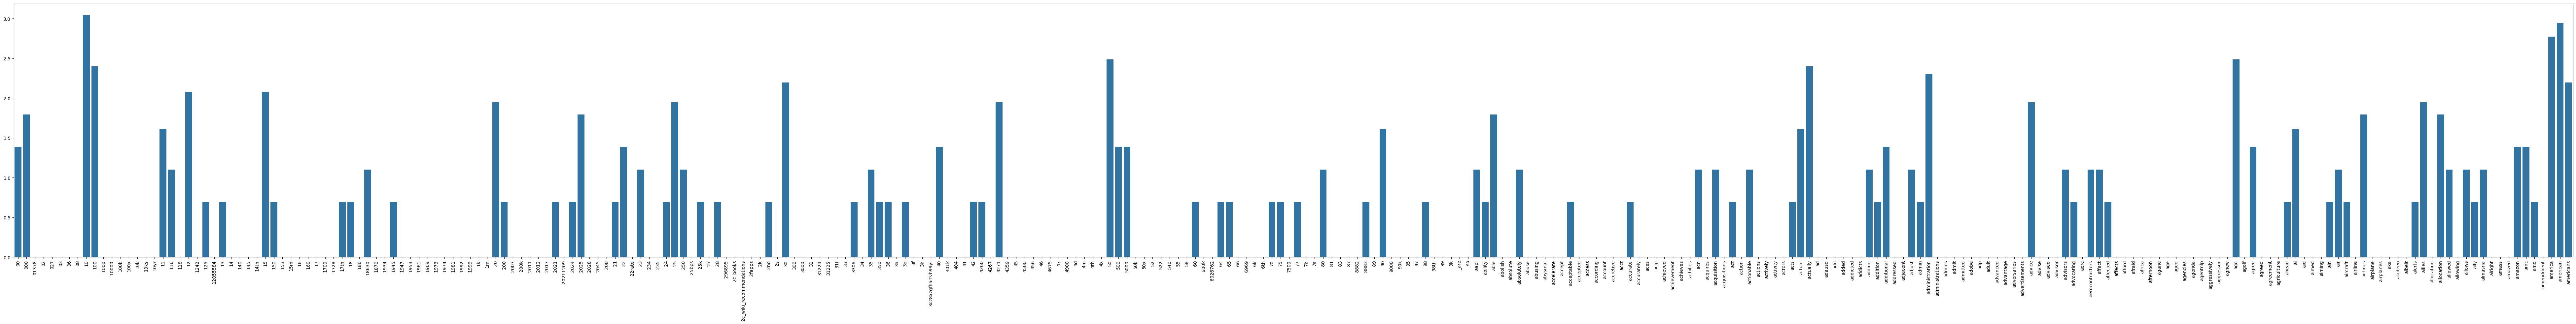

In [28]:
import math


# 避免 log(0)：把 0 改成 1
# Avoid log(0): replace 0 with 1
tf_safe = np.where(term_frequencies <= 0, 1, term_frequencies)

term_frequencies_log = [math.log(i) for i in tf_safe]

plt.subplots(figsize=(100, 10))
g = sns.barplot(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies_log[:300]
)
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)
plt.show()



### EXERCISE 15

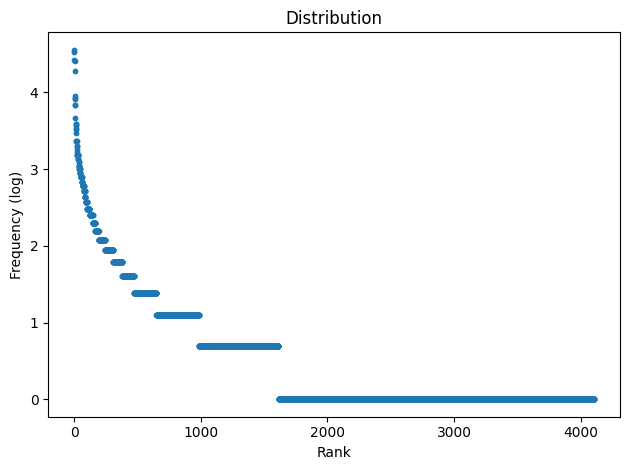

In [29]:
# Answer here


# 把 term_frequencies 改成 term_frequencies_log 就好
tf = np.asarray(term_frequencies_log).ravel()
tf_sorted = np.sort(tf)[::-1]  # 小到大排序後倒轉（由大到小）

# 把順序用 arange 生成等差數列（rank）
ranks = np.arange(1, len(tf_sorted) + 1)

plt.scatter(x=ranks, y=tf_sorted, s=10)  # 畫散佈圖
plt.title("Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency (log)")
plt.tight_layout()
plt.show()



### COMMENT
發現:
1.log 後更容易看出RANK 0-1000的變化，曲線不像原本一樣很快就降到0附近
1. fter applying the log transformation, it becomes easier to observe changes in the lower-rank region (roughly rank 1–1000). The curve no longer drops to near zero as quickly as in the original term-frequency plot, so differences among medium- and low-frequency terms are more visible.
2.水平的橫槓代表許多詞有相同頻率 / Horizontal steps mean many ties

# Part 2 new visualization

1. 情緒在不同REDDIT子版的比例

可以看出正向情緒整偏少，Stocktodaytoby子版的中立情緒特別多，且費面情緒比例最少

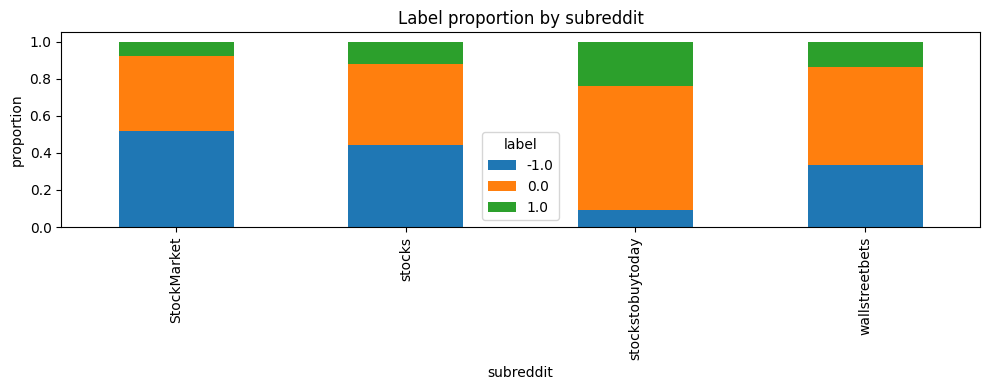

In [30]:

pivot = pd.crosstab(df_work["subreddit"], df_work["label"], normalize="index")
ax = pivot.plot(kind="bar", stacked=True, figsize=(10,4))
ax.set_title("Label proportion by subreddit")
ax.set_xlabel("subreddit")
ax.set_ylabel("proportion")
plt.tight_layout()
plt.show()


2. polarity vs subjectivity Scatter plot
 來看情緒極端程度跟主觀程度有沒有關係

INSIGHT:
 這張 polarity vs subjectivity 的散點圖顯示，多數資料點集中在 polarity 接近 0 的區域，代表很多貼文在情緒正負向上被判定為偏中性。另外可以觀察到一個趨勢：當 subjectivity 較低（較客觀）時，polarity 多半聚集在 0 附近；當 subjectivity 較高（較主觀）時，polarity 的分布範圍變大，正負情緒的點都更常出現

The polarity vs subjectivity scatter plot shows that most points cluster around polarity values close to 0, suggesting that many posts are assessed as fairly neutral in terms of sentiment direction. Another clear pattern is that when subjectivity is low (more objective text), polarity tends to stay near 0; when subjectivity is higher (more subjective text), polarity spreads out more widely, and both positive and negative sentiment values appear more often.

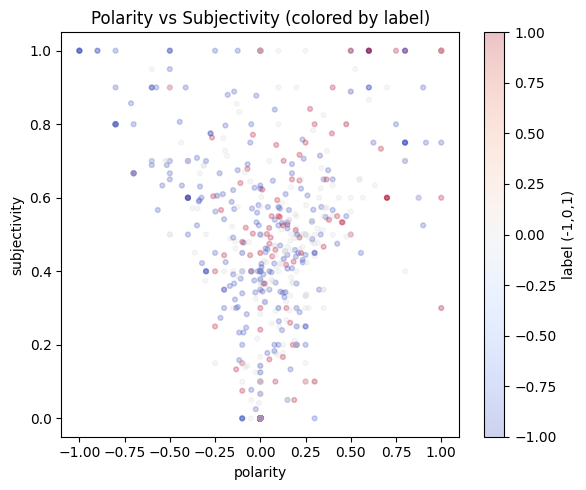

In [31]:

tmp = df_work.dropna(subset=["polarity", "subjectivity"]).copy()
plt.figure(figsize=(6,5))
sc = plt.scatter(tmp["polarity"], tmp["subjectivity"], c=tmp["label"], cmap="coolwarm", alpha=0.25, s=12)
plt.colorbar(sc, label="label (-1,0,1)")
plt.title("Polarity vs Subjectivity (colored by label)")
plt.xlabel("polarity")
plt.ylabel("subjectivity")
plt.tight_layout()
plt.show()


# Phase 2

### Content
part 2 exercise on new dataset

Part 3 TF‑IDF & Naive Bayes 

Part 4 Comment the inefficient

### part 2 exercise on new dataset

### 5.4.2 Finding frequent patterns
We follow the same Master workflow and use subreddit as the category. We first build term-document matrices per category, then mine frequent patterns with PAMI.


In [60]:

# Phase 2: define category by subreddit
X = df_work[["text", "subreddit"]].copy()
X["text"] = X["text"].fillna("").astype(str)
X["category"] = X["subreddit"].fillna("unknown").astype(str)
X["category_name"] = X["category"]

categories = X["category_name"].unique().tolist()
target_names = categories

# Create separate DataFrames for each category
category_dfs = {}
for category in categories:
    category_dfs[category] = X[X["category_name"] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()
    X_counts = count_vect.fit_transform(df["text"])
    words = count_vect.get_feature_names_out()
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    return term_document_df

filt_term_document_dfs = {}
for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

category_number = 0
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
display(filt_term_document_dfs[categories[category_number]].head())


Filtered Term-Document Frequency DataFrame for Category wallstreetbets:


,10,100,1000,10k,12,17th,186,18630,1934,1981,...,xi,year,years,yesterday,yet,yippee,you,your,yourself,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


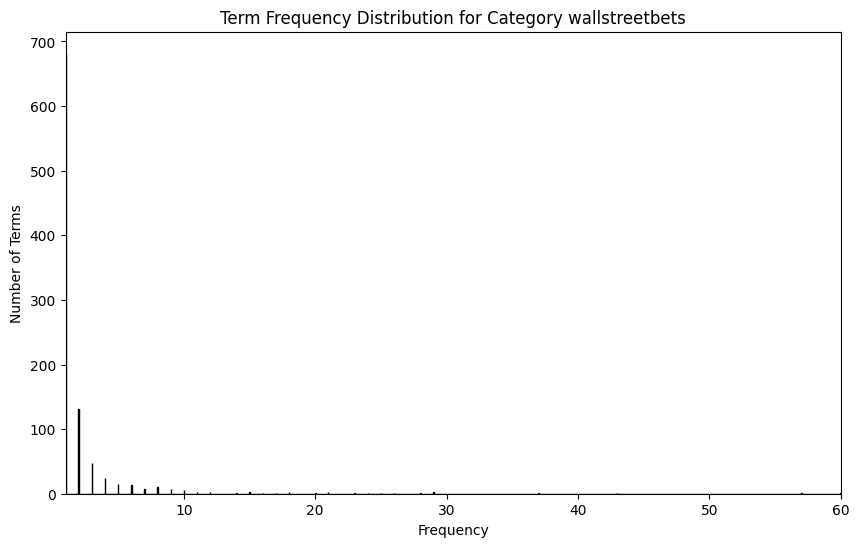

In [61]:
# Visualize term frequency distribution for one category
import matplotlib.pyplot as plt

category_number = 0
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

plt.figure(figsize=(10, 6))
plt.hist(word_counts, bins=2000, color="steelblue", edgecolor="black")
plt.title(f"Term Frequency Distribution for Category {categories[category_number]}")
plt.xlabel("Frequency")
plt.ylabel("Number of Terms")
plt.xlim(1, 60)
plt.show()


In [62]:
# Explore top 5 percent most frequent words
category_number = 0
word_counts = filt_term_document_dfs[categories[category_number]].sum(axis=0).to_numpy()

sorted_indices = np.argsort(word_counts)[::-1]
sorted_counts = np.sort(word_counts)[::-1]

total_terms = len(sorted_counts)
top_5_percent_index = int(0.05 * total_terms)
top_5_percent_indices = sorted_indices[:top_5_percent_index]

filtered_words = [filt_term_document_dfs[categories[category_number]].iloc[:, i].name for i in top_5_percent_indices]

print(f"Category: {categories[category_number]}")
print(f"Number of terms in top 5 percent: {top_5_percent_index}")
print(f"Filtered terms sample: {filtered_words[:30]}")


Category: wallstreetbets
Number of terms in top 5 percent: 48
Filtered terms sample: ['to', 'the', 'it', 'and', 'in', 'is', 'you', 'for', 'they', 'this', 'of', 'my', 'that', 'on', 't5_2th52', 'emote', 'img', 'so', 'like', 'but', 'can', 'just', 'at', 'are', 'have', 'over', 'all', 'was', 'target', 'will']


In [63]:
# Filter bottom 1 percent and top 5 percent words by sum
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    word_sums = term_document_df.sum(axis=0)
    sorted_words = word_sums.sort_values()
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f"Bottom {bottom_percent*100}% words: {bottom_n}")
    print(f"Top {top_percent*100}% words: {top_n}")
    return term_document_df.drop(columns=words_to_remove)

term_document_dfs = {}
for category in categories:
    print(f"\nFor category {category} we filter the following words:")
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

category_number = 0
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
display(term_document_dfs[categories[category_number]].head())



For category wallstreetbets we filter the following words:
Bottom 1.0% words: 9
Top 5.0% words: 48

For category StockMarket we filter the following words:
Bottom 1.0% words: 15
Top 5.0% words: 79

For category stockstobuytoday we filter the following words:
Bottom 1.0% words: 16
Top 5.0% words: 80

For category stocks we filter the following words:
Bottom 1.0% words: 23
Top 5.0% words: 117
Filtered Term-Document Frequency DataFrame for Category wallstreetbets:


,10,100,1000,10k,12,17th,186,18630,1934,208,...,wutang,xi,year,years,yesterday,yet,yippee,your,yourself,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exercise 16 

使用 bottom 1% + top 5% 規則後, 各 subreddit 的詞彙量差異明顯: stocks 約 2346, wallstreetbets 約 972. 被移除的詞約占 5.8% 到 6.0%, 各類過濾強度一致. removed 詞彙重疊度最高的是 StockMarket vs stocks (Jaccard 0.4268), 最低是 wallstreetbets vs stocks (0.2548), 顯示 stocks 與 StockMarket 用字較接近, wallstreetbets 相對獨立. top kept terms 也反映主題差異: stockstobuytoday 有 upgrades, ev, aviation 這類選股詞, StockMarket 有 dollar, could, than, wallstreetbets 有 china, tariffs, week, stocks 則常見 stocks, reddit, year 等一般詞. 這些結果表示過濾確實去掉噪音與過度常見詞, 並保留較具類別差異的詞彙.

After applying the bottom 1% + top 5% filter, the vocabulary sizes differ across subreddits. stocks is the largest at about 2346 terms, while wallstreetbets is the smallest at about 972. The removed terms are around 5.8% to 6.0% for each class, so the filtering strength is consistent. The highest overlap of removed terms is StockMarket vs stocks (Jaccard 0.4268), and the lowest is wallstreetbets vs stocks (0.2548), which suggests stocks and StockMarket are closer in wording while wallstreetbets is more distinct. The top kept terms also highlight topical differences. stockstobuytoday includes upgrades, ev, aviation, StockMarket has dollar, could, than, wallstreetbets has china, tariffs, week, and stocks keeps general words like stocks, reddit, year. This indicates the filter removes noise and very common words while retaining more category specific vocabulary.


Now we convert each filtered term-document matrix into transactional data for PAMI. We use a threshold of >= 1 to include words that appear at least once.


In [64]:
# Force utf-8 for csv writes (Windows cp950 workaround)
import builtins
_orig_open = open

def safe_open(*args, **kwargs):
    if len(args) > 0 and isinstance(args[0], str) and args[0].endswith(".csv"):
        kwargs["encoding"] = "utf-8"
        kwargs["errors"] = "ignore"
    return _orig_open(*args, **kwargs)

builtins.open = safe_open


In [65]:
from PAMI.extras.convert.DF2DB import DF2DB

for category in term_document_dfs:
    category_safe = category.replace(" ", "_")
    obj = DF2DB(term_document_dfs[category])
    obj.convert2TransactionalDatabase(f"td_freq_db_{category_safe}.csv", ">=", 1)


Stats for wallstreetbets:
Database size (total no of transactions) : 145
Number of items : 915
Minimum Transaction Size : 1
Average Transaction Size : 9.379310344827585
Maximum Transaction Size : 64
Standard Deviation Transaction Size : 9.441704233596845
Variance in Transaction Sizes : 89.76484674329502
Sparsity : 0.9897493876012813


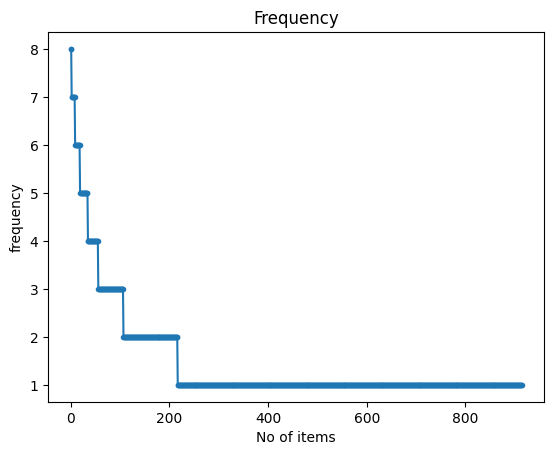

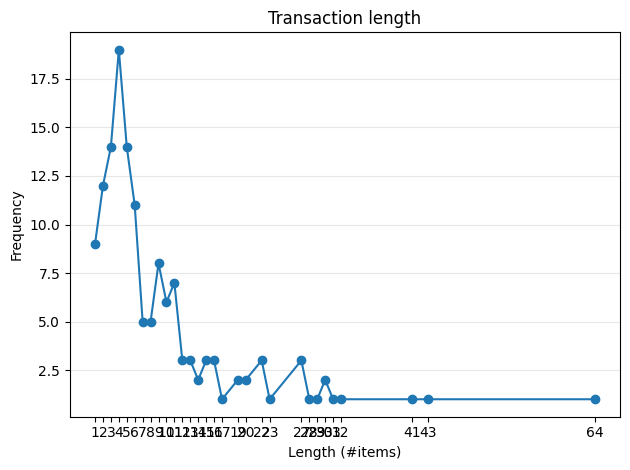

Stats for StockMarket:
Database size (total no of transactions) : 248
Number of items : 1499
Minimum Transaction Size : 1
Average Transaction Size : 10.149193548387096
Maximum Transaction Size : 145
Standard Deviation Transaction Size : 12.355206529309571
Variance in Transaction Sizes : 153.2691491445736
Sparsity : 0.9932293572058792


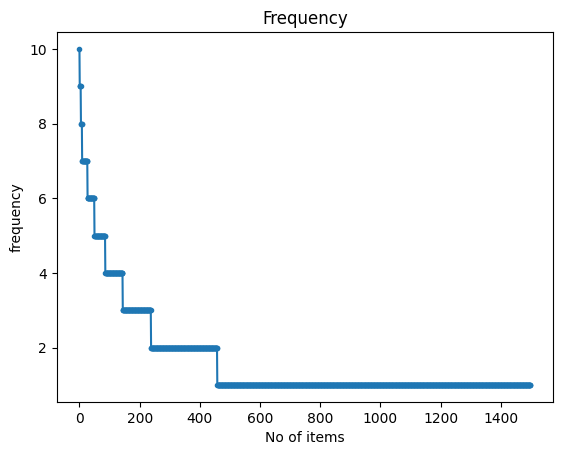

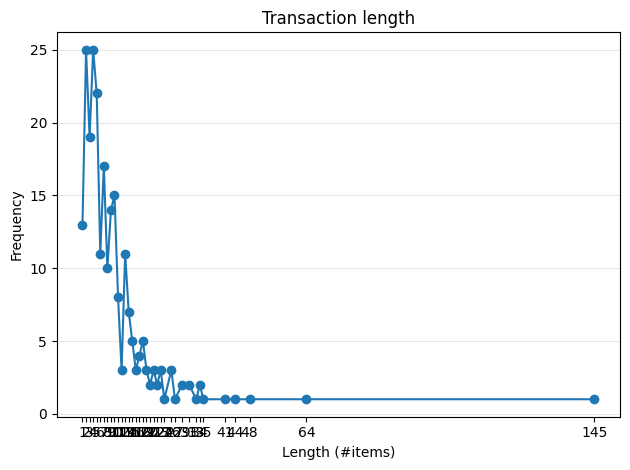

Stats for stockstobuytoday:
Database size (total no of transactions) : 150
Number of items : 1522
Minimum Transaction Size : 1
Average Transaction Size : 14.653333333333334
Maximum Transaction Size : 217
Standard Deviation Transaction Size : 26.93696015184754
Variance in Transaction Sizes : 730.4696196868009
Sparsity : 0.9903723171265878


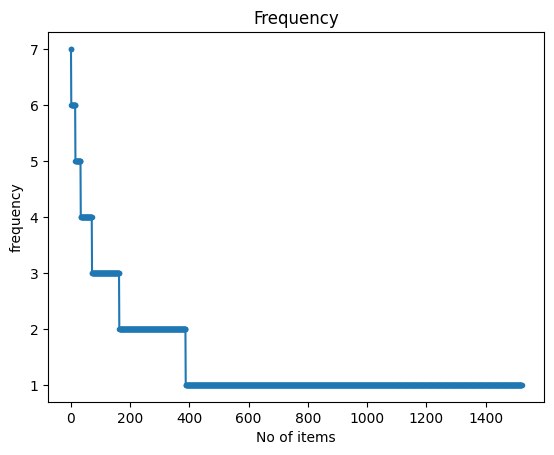

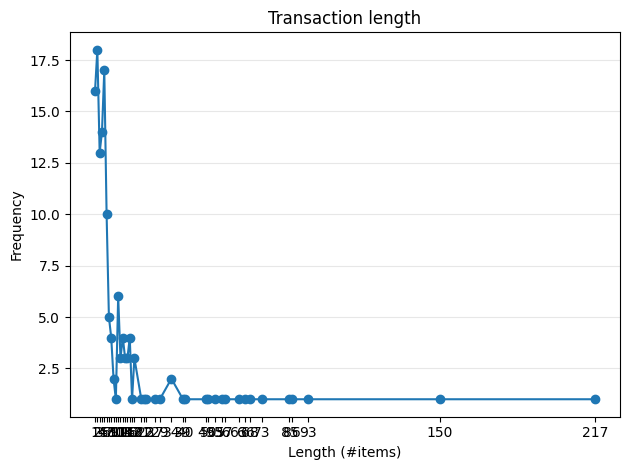

Stats for stocks:
Database size (total no of transactions) : 273
Number of items : 2206
Minimum Transaction Size : 1
Average Transaction Size : 14.326007326007327
Maximum Transaction Size : 164
Standard Deviation Transaction Size : 16.976603739698493
Variance in Transaction Sizes : 289.26465201465203
Sparsity : 0.9935058896980927


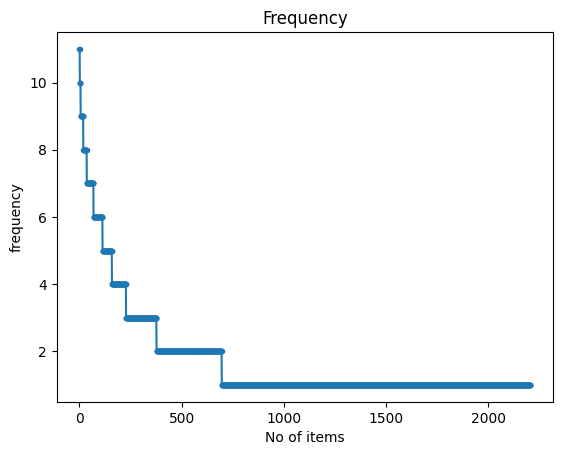

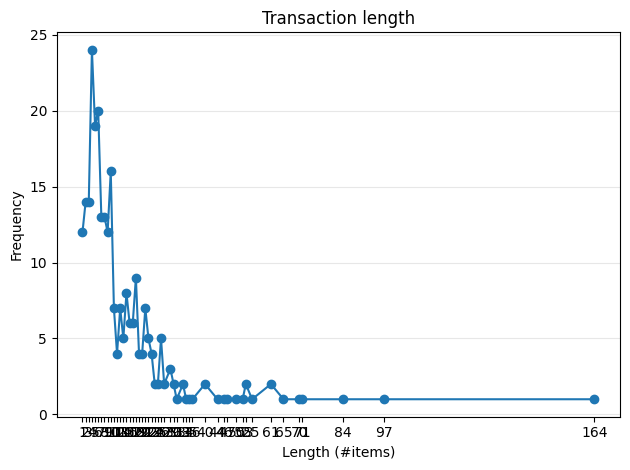

In [66]:
from PAMI.extras.dbStats import TransactionalDatabase as tds

for category in term_document_dfs:
    category_safe = category.replace(" ", "_")
    print(f"Stats for {category_safe}:")
    obj = tds.TransactionalDatabase(f"td_freq_db_{category_safe}.csv")
    obj.run()
    obj.printStats()
    obj.plotGraphs()


Now we can mine frequent patterns using FPGrowth with a fixed minimum support.


In [67]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup = 9
frequent_pattern_dfs = {}

for category in term_document_dfs:
    category_safe = category.replace(" ", "_")
    obj = alg.FPGrowth(iFile=f"td_freq_db_{category_safe}.csv", minSup=minSup)
    obj.mine()
    df_pat = obj.getPatternsAsDataFrame()
    frequent_pattern_dfs[category] = df_pat
    print(f"Category: {category} | Total patterns: {len(df_pat)}")
    print(f"Runtime: {obj.getRuntime()}")
    obj.save(f"freq_patterns_{category_safe}_minSup{minSup}.txt")
    display(df_pat.head())


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Category: wallstreetbets | Total patterns: 0
Runtime: 0.002003192901611328


,Patterns,Support


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Category: StockMarket | Total patterns: 5
Runtime: 0.0020062923431396484


,Patterns,Support
0,why,9
1,way,9
2,want,9
3,than,9
4,other,10


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Category: stockstobuytoday | Total patterns: 0
Runtime: 0.0009984970092773438


,Patterns,Support


Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Category: stocks | Total patterns: 19
Runtime: 0.004000186920166016


,Patterns,Support
0,looking,9
1,ve,9
2,right,9
3,buying,9
4,seems,9


### Exercise 17 

以 wallstreetbets 為示範類別, 觀察 FAE Top-K 與 MaxFPGrowth 的 pattern 數量與 runtime, 並與 FPGrowth 做比較.

I use wallstreetbets as the example category. Compare FAE Top-K and MaxFPGrowth by pattern count and runtime, and relate them to FPGrowth.


In [69]:
# FAE Top-K and MaxFPGrowth on wallstreetbets
# Make sure td_freq_db_wallstreetbets.csv exists from the transactional conversion step.
from PAMI.frequentPattern.topk import FAE as fae
from PAMI.frequentPattern.maximal import MaxFPGrowth as maxfp

category_focus = "wallstreetbets"
db_file = f"td_freq_db_{category_focus}.csv"

# FAE Top-K
for k in [500, 1000, 1500]:
    obj = fae.FAE(iFile=db_file, k=k)
    obj.mine()
    df_k = obj.getPatternsAsDataFrame()
    print(f"FAE Top-K k={k} | patterns={len(df_k)} | runtime={obj.getRuntime()}")
    display(df_k.head())

# MaxFPGrowth
for minsup in [3, 6, 9]:
    obj = maxfp.MaxFPGrowth(iFile=db_file, minSup=minsup)
    obj.mine()
    df_m = obj.getPatternsAsDataFrame()
    print(f"MaxFPGrowth minSup={minsup} | patterns={len(df_m)} | runtime={obj.getRuntime()}")
    display(df_m.head())


KeyboardInterrupt: 

觀察: FAE Top-K 會固定輸出 K 個 patterns, k 越大 runtime 通常越長, pattern 覆蓋面更廣. MaxFPGrowth 會隨 minSup 增加而大幅減少 patterns, 並偏向較長的 maximal patterns, 結果較精簡. 和 FPGrowth 相比, Top-K 強調高頻 patterns 排序, MaxFPGrowth 則是去除冗餘後的精簡集合. 這三種方法對同一類別的觀察角度不同, 需依分析目標選擇.

Observation: FAE Top-K always returns exactly K patterns, and runtime usually grows with larger k while coverage becomes broader. MaxFPGrowth returns fewer patterns as minSup increases and focuses on longer maximal patterns, giving a more compact set. Compared with FPGrowth, Top-K emphasizes ranking by frequency, while MaxFPGrowth removes redundancy and keeps only maximal patterns. These methods provide different views of the same category, so the choice depends on the analysis goal.


Next, we keep only patterns that are unique to a single category and build the augmented feature matrix.



In [70]:
# Keep only patterns unique to a single category
dfs = list(frequent_pattern_dfs.values())

pattern_counts = {}
for dfp in dfs:
    for pattern in dfp["Patterns"]:
        pattern_counts[pattern] = pattern_counts.get(pattern, 0) + 1

unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
total_patterns_count = sum(len(dfp) for dfp in dfs)
discarded_patterns_count = total_patterns_count - len(unique_patterns)

filtered_dfs = []
for dfp in dfs:
    filtered_dfs.append(dfp[dfp["Patterns"].isin(unique_patterns)])

final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)
final_pattern_df = final_pattern_df.sort_values(by="Support", ascending=False)

print(final_pattern_df.head())
print(f"Number of patterns discarded: {discarded_patterns_count}")


   Patterns Support
21     also      11
20   things      11
3     other      10
19     know      10
18     shit      10
Number of patterns discarded: 2


In [71]:
# Build pattern matrix and augmented features (dense version, Master style)
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X["text"])
terms = count_vect.get_feature_names_out()

X["tokenized_text"] = X["text"].str.split().apply(set)

pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df["Patterns"])
for pattern in final_pattern_df["Patterns"]:
    pattern_words = set(pattern.split())
    pattern_matrix[pattern] = X["tokenized_text"].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

print("TDM shape:", tdm_df.shape)
print("Pattern matrix shape:", pattern_matrix.shape)
print("Augmented shape:", augmented_df.shape)


TDM shape: (824, 4346)
Pattern matrix shape: (824, 22)
Augmented shape: (824, 4368)


In [72]:
# because memory is an issue in master, I prefer use sparse augmentation instead
from scipy.sparse import csr_matrix, hstack

pattern_list = final_pattern_df["Patterns"].astype(str).tolist()
token_sets = X["text"].str.split().apply(set)

rows = []
cols = []
data = []

for j, pattern in enumerate(pattern_list):
    words = set(pattern.split())
    hit = token_sets.apply(lambda s: words.issubset(s)).to_numpy()
    hit_idx = np.where(hit)[0]
    rows.extend(hit_idx.tolist())
    cols.extend([j] * len(hit_idx))
    data.extend([1] * len(hit_idx))

X_pat = csr_matrix((data, (rows, cols)), shape=(X.shape[0], len(pattern_list)), dtype=np.float32)
X_aug = hstack([X_tdm.astype(np.float32), X_pat], format="csr")

print("Sparse X_aug shape:", X_aug.shape)


Sparse X_aug shape: (824, 4368)


### 5.5 Dimensionality Reduction for Phase 2

接下來對 TDM 與 augmented 特徵做降維視覺化. 因為資料是稀疏矩陣, 先用 TruncatedSVD 降到較低維度, 再用 t-SNE 與 UMAP，用PCA會炸我電腦記憶體

Next we visualize both the TDM and the augmented features. Since the data is sparse, we first apply TruncatedSVD and then run t-SNE and UMAP. We use SVD instead of pca because my computer ram will crash


In [73]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE
import umap

categories = X["category_name"].unique().tolist()
colors = plt.cm.tab10(np.linspace(0, 1, len(categories)))

def plot_scatter(ax, X_reduced, title):
    for c, category in zip(colors, categories):
        mask = (X["category_name"] == category).to_numpy()
        ax.scatter(X_reduced[mask, 0], X_reduced[mask, 1],
                   c=[c], s=12, alpha=0.6, label=category)
    ax.grid(color="gray", linestyle=":", linewidth=1, alpha=0.3)
    ax.set_title(title)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend(loc="best")


c:\Users\81203\DM2025\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


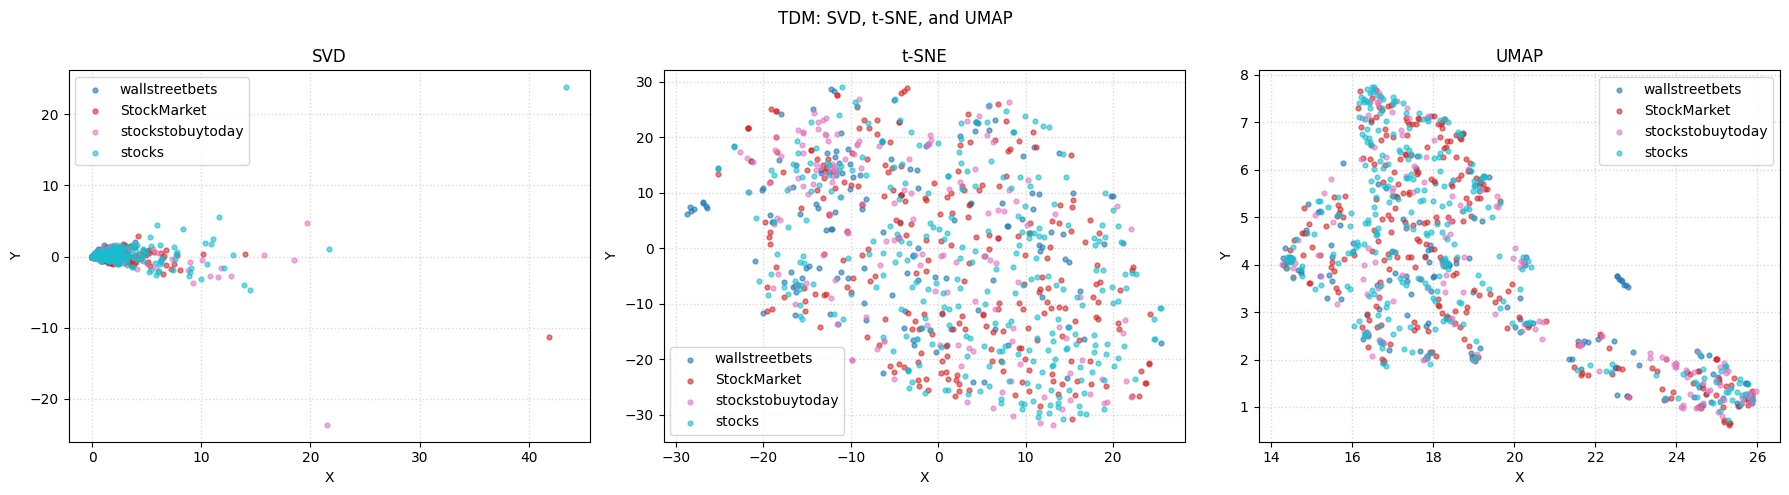

In [ ]:
# Reduce dimension for TDM (sparse) and visualize
max_components = min(X_tdm.shape[0] - 1, X_tdm.shape[1] - 1)
svd_dims = max(2, min(50, max_components))

svd_2d = TruncatedSVD(n_components=2, random_state=42)
X_svd_tdm = svd_2d.fit_transform(X_tdm)

svd_50 = TruncatedSVD(n_components=svd_dims, random_state=42)
X_tdm_50 = svd_50.fit_transform(X_tdm)

tsne = TSNE(n_components=2, random_state=42, init="pca", learning_rate="auto")
X_tsne_tdm = tsne.fit_transform(X_tdm_50)

umap_2d = umap.UMAP(n_components=2, random_state=42)
X_umap_tdm = umap_2d.fit_transform(X_tdm_50)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("TDM: SVD, t-SNE, and UMAP")
plot_scatter(axes[0], X_svd_tdm, "SVD")
plot_scatter(axes[1], X_tsne_tdm, "t-SNE")
plot_scatter(axes[2], X_umap_tdm, "UMAP")
plt.tight_layout()
plt.show()


c:\Users\81203\DM2025\DM2025-Lab1-Exercise\.venv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


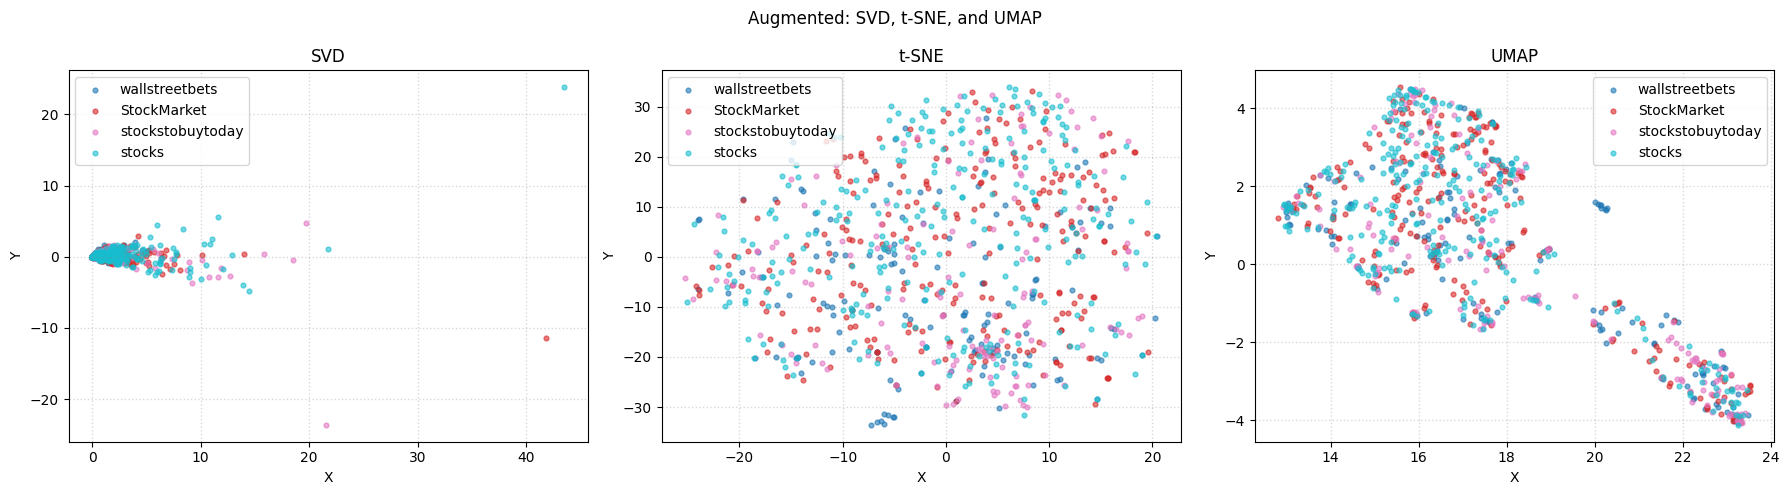

In [ ]:
# Reduce dimension for augmented features (sparse) and visualize
max_components_aug = min(X_aug.shape[0] - 1, X_aug.shape[1] - 1)
svd_dims_aug = max(2, min(50, max_components_aug))

svd_2d_aug = TruncatedSVD(n_components=2, random_state=42)
X_svd_aug = svd_2d_aug.fit_transform(X_aug)

svd_50_aug = TruncatedSVD(n_components=svd_dims_aug, random_state=42)
X_aug_50 = svd_50_aug.fit_transform(X_aug)

tsne_aug = TSNE(n_components=2, random_state=42, init="pca", learning_rate="auto")
X_tsne_aug = tsne_aug.fit_transform(X_aug_50)

umap_2d_aug = umap.UMAP(n_components=2, random_state=42)
X_umap_aug = umap_2d_aug.fit_transform(X_aug_50)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle("Augmented: SVD, t-SNE, and UMAP")
plot_scatter(axes[0], X_svd_aug, "SVD")
plot_scatter(axes[1], X_tsne_aug, "t-SNE")
plot_scatter(axes[2], X_umap_aug, "UMAP")
plt.tight_layout()
plt.show()


中文: TDM 的 SVD 圖大多數點集中在原點附近, 只有少數離群點, 各 subreddit 高度重疊. t-SNE 仍是大片混合雲, 類別邊界不明顯. UMAP 看得出主體群加上一個延伸的分支, 但不同 subreddit 依然交錯. Augmented 後 SVD 與 t-SNE 的重疊情況差不多, UMAP 的結構仍是主群加分支, 混合程度略有下降但沒有形成清楚分群, 顯示 pattern augmentation 對分離度的提升有限.

English observation: In the TDM plots, SVD collapses most points near the origin with a few outliers, and subreddit classes overlap heavily. The t-SNE view is a mixed cloud with no clear boundaries. UMAP shows a main cluster with a tail like branch, but classes remain intermingled. After augmentation, SVD and t-SNE look similar, and UMAP keeps the same main cluster plus branch structure. The overlap is slightly reduced in some regions, yet there is no strong separation, so pattern augmentation provides only modest structural improvement.


### Exercise 18 (take home)

Use 3D reduction to visualize the data and comment on your observations.


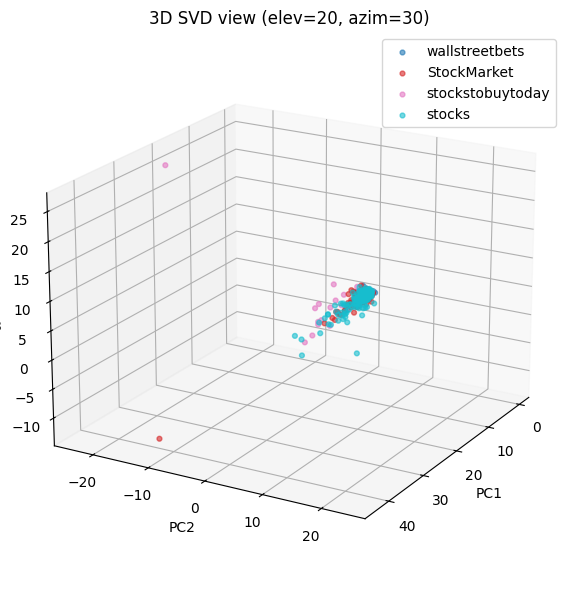

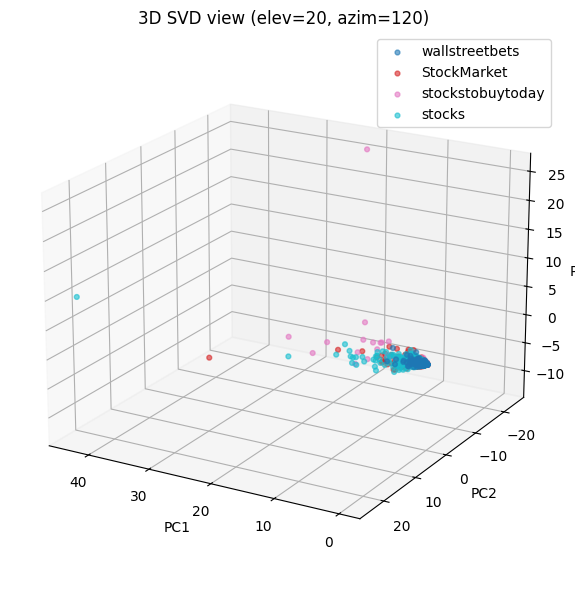

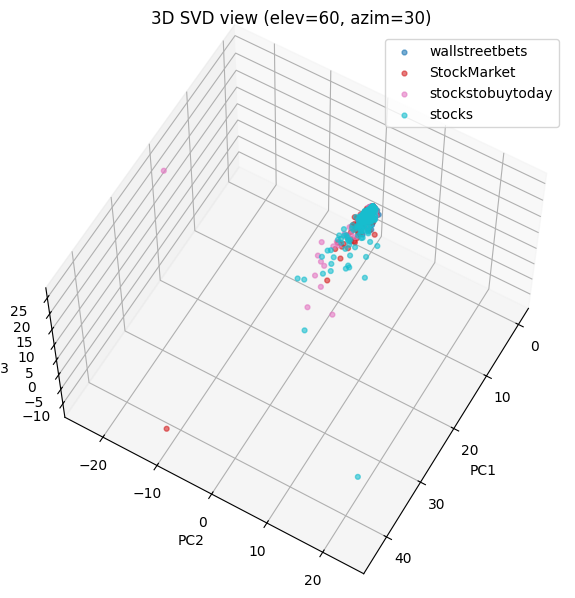

In [74]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401
from sklearn.decomposition import TruncatedSVD

# 3D reduction on TDM using TruncatedSVD (sparse friendly)
svd3 = TruncatedSVD(n_components=3, random_state=42)
X_3d = svd3.fit_transform(X_tdm)

cats = X["category_name"].unique()
colors = plt.cm.tab10(np.linspace(0, 1, len(cats)))

def plot_3d(elev, azim, title):
    fig = plt.figure(figsize=(7, 6))
    ax = fig.add_subplot(111, projection="3d")
    for c, cat in zip(colors, cats):
        mask = (X["category_name"] == cat).to_numpy()
        ax.scatter(X_3d[mask, 0], X_3d[mask, 1], X_3d[mask, 2],
                   c=[c], s=12, alpha=0.6, label=cat)
    ax.view_init(elev=elev, azim=azim)
    ax.set_title(title)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.legend(loc="best")
    plt.tight_layout()
    plt.show()

# Different views
views = [(20, 30), (20, 120), (60, 30)]
for elev, azim in views:
    plot_3d(elev, azim, f"3D SVD view (elev={elev}, azim={azim})")


觀察: 3D SVD 在不同視角下仍是高度重疊的雲狀分布, 各 subreddit 沒有明顯分界. 少數點形成小範圍聚集, 但整體仍以混合為主, 顯示純詞頻特徵下的類別可分性有限.

### 5.6 Discretization and Binarization

We binarize the subreddit labels so each record maps to a one hot vector for later analysis.


In [ ]:
from sklearn import preprocessing

lb = preprocessing.LabelBinarizer()
lb.fit(X["category"])
X["bin_category"] = lb.transform(X["category"]).tolist()

display(X[["category", "bin_category"]].head(10))


,category,bin_category
0,wallstreetbets,"[0, 0, 0, 1]"
1,wallstreetbets,"[0, 0, 0, 1]"
2,StockMarket,"[1, 0, 0, 0]"
3,stockstobuytoday,"[0, 0, 1, 0]"
4,StockMarket,"[1, 0, 0, 0]"
5,wallstreetbets,"[0, 0, 0, 1]"
6,stocks,"[0, 1, 0, 0]"
7,wallstreetbets,"[0, 0, 0, 1]"
8,stocks,"[0, 1, 0, 0]"
9,stockstobuytoday,"[0, 0, 1, 0]"


### 5.7 Similarity Measures

Compute cosine similarity between a few documents to compare their word distributions.




In [78]:

from sklearn.metrics.pairwise import cosine_similarity
# Pick three documents for similarity check
doc1 = X_tdm[0]
doc2 = X_tdm[1]
doc3 = X_tdm[2]

def cos_sim(a, b):
    return cosine_similarity(a, b)[0, 0].item()

print("Cosine Similarity using count bw 1 and 2: %(x)f" % {"x": cos_sim(doc1, doc2)})
print("Cosine Similarity using count bw 1 and 3: %(x)f" % {"x": cos_sim(doc1, doc3)})
print("Cosine Similarity using count bw 2 and 3: %(x)f" % {"x": cos_sim(doc2, doc3)})
print("Cosine Similarity using count bw 1 and 1: %(x)f" % {"x": cos_sim(doc1, doc1)})
print("Cosine Similarity using count bw 2 and 2: %(x)f" % {"x": cos_sim(doc2, doc2)})
print("Cosine Similarity using count bw 3 and 3: %(x)f" % {"x": cos_sim(doc3, doc3)})


Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.200446
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


### Exercise 19

Try to generate the binarization using the `category_name` column instead. Does it work?

In [80]:
print("LabelBinarizer classes:", lb.classes_)
print("Unique categories in X:", sorted(X["category"].unique().tolist()))
print("Category counts:")
print(X["category"].value_counts())

LabelBinarizer classes: ['StockMarket' 'stocks' 'stockstobuytoday' 'wallstreetbets']
Unique categories in X: ['StockMarket', 'stocks', 'stockstobuytoday', 'wallstreetbets']
Category counts:
category
stocks              273
StockMarket         250
stockstobuytoday    152
wallstreetbets      149
Name: count, dtype: int64


LabelBinarizer 的 classes 和 X 中的 unique categories 完全一致，代表目前資料子集沒有漏掉任何 subreddit。四個類別都有出現且數量差異不大，stocks 稍多、wallstreetbets 最少，但整體仍算平衡。這也說明如果之後 classes 有缺，通常是前面做了篩選或抽樣，並不是 LabelBinarizer 本身的問題。

English paragraph
The LabelBinarizer classes match the unique categories in X, so no subreddit is missing in the current subset. All four classes are present and the counts are fairly balanced, with stocks slightly larger and wallstreetbets the smallest. This indicates that any missing classes in other runs would come from filtering or sampling earlier, not from LabelBinarizer itself.

### Exercise 20 (take home)

Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? How can the results be interpreted?


English:
Report whether the similarities are low or high and relate them to the document categories. If the texts come from different subreddits, cosine similarity is usually lower, which indicates limited overlap in word usage. If two texts are from the same subreddit or share similar vocabulary, the similarity should be higher.


### 6 Explore

We explore the filtered terms in another way and compare categories.


In [84]:
# FIRST WE EXPLORE THE DATA IN ANOTHER WAY
import itertools

top_percent = 0.05
bottom_percent = 0.01

summary = {}

for category in categories:
    df_td = filt_term_document_dfs[category]
    word_sums = df_td.sum(axis=0).sort_values()
    total_words = len(word_sums)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)

    bottom_words = word_sums.head(bottom_n)
    top_words = word_sums.tail(top_n)

    removed_series = pd.concat([bottom_words, top_words])
    removed_set = set(removed_series.index)

    df_filtered = df_td.drop(columns=list(removed_set))
    kept_set = set(df_filtered.columns)

    kept_sums = df_filtered.sum(axis=0).sort_values(ascending=False)

    summary[category] = {
        "total_terms": total_words,
        "removed_terms": len(removed_set),
        "kept_terms": len(kept_set),
        "removed_set": removed_set,
        "kept_set": kept_set,
        "bottom_sample": bottom_words.head(10),
        "top_sample": top_words.tail(10),
        "top_kept_terms": kept_sums.head(30),
    }

# 1) per category stats
display(pd.DataFrame({
    cat: {
        "total_terms": summary[cat]["total_terms"],
        "removed_terms": summary[cat]["removed_terms"],
        "kept_terms": summary[cat]["kept_terms"],
    }
    for cat in categories
}).T)

# 2) removed term overlap (Jaccard)
pairs = []
for a, b in itertools.combinations(categories, 2):
    A = summary[a]["removed_set"]
    B = summary[b]["removed_set"]
    jaccard = len(A & B) / len(A | B) if (A | B) else 0.0
    pairs.append({"cat_a": a, "cat_b": b, "removed_jaccard": jaccard})

display(pd.DataFrame(pairs).sort_values("removed_jaccard", ascending=False))

# 3) unique removed terms per category (sample)
for cat in categories:
    others_removed = set().union(*[summary[c]["removed_set"] for c in categories if c != cat])
    unique_removed = summary[cat]["removed_set"] - others_removed
    print(f"=== Unique removed terms for {cat} (sample 40) ===")
    print(list(sorted(unique_removed))[:40])

# 4) top kept terms per category
for cat in categories:
    print(f"=== Top kept terms after filtering for {cat} ===")
    display(summary[cat]["top_kept_terms"])


,total_terms,removed_terms,kept_terms
wallstreetbets,972,57,915
StockMarket,1593,94,1499
stockstobuytoday,1618,96,1522
stocks,2346,140,2206


,cat_a,cat_b,removed_jaccard
4,StockMarket,stocks,0.426829
3,StockMarket,stockstobuytoday,0.357143
0,wallstreetbets,StockMarket,0.348214
5,stockstobuytoday,stocks,0.325843
1,wallstreetbets,stockstobuytoday,0.307692
2,wallstreetbets,stocks,0.254777


=== Unique removed terms for wallstreetbets (sample 40) ===
['1981', '1m', '20', '200k', '2012', '31224', '31225', '350', 'emote', 'img', 'puts', 'she', 'still', 't5_2th52', 'target']
=== Unique removed terms for StockMarket (sample 40) ===
['1947', '1953', '1961', '250', '28', '2s', '36', '3d', '401k', '404', 'doesn', 'everyone', 'him', 'president', 'right', 'say', 'should', 'wow', 'wrote', 'ww2', 'xi', 'yea', 'yes']
=== Unique removed terms for stockstobuytoday (sample 40) ===
['153', '15m', '16', '1728', '17th', '1992', '200', '2017', '20211209', 'after', 'also', 'analysis', 'aviation', 'com', 'electric', 'ev', 'futures', 'graphite', 'group', 'industry', 'its', 'lithium', 'new', 'price', 'random', 'randomized', 'rang', 'share', 'star', 'stock', 'stockbuyvest', 'stocks', 'technology', 'today', 'worth', 'x200b', 'zone']
=== Unique removed terms for stocks (sample 40) ===
['10', '10000', '10ks', '10yr', '125', '13', '140', '14th', '160', '17', '1700', '1870', '2fapps', '2nd', '300', '3

when         8
see          8
if           8
go           8
us           7
tariffs      7
get          7
me           7
china        7
week         7
4271         7
your         7
by           6
retarded     6
ve           6
then         6
been         6
only         6
their        6
calls        6
did          6
him          6
literally    6
years        6
day          6
one          5
ll           5
our          5
retard       5
back         5
dtype: int64

=== Top kept terms after filtering for StockMarket ===


other      10
been       10
why        10
way        10
tariffs     9
want        9
than        9
dollar      9
could       8
then        8
really      8
know        8
first       8
never       8
because     8
much        8
well        8
call        8
had         7
deal        7
economy     7
gonna       7
usa         7
plan        7
over        7
usd         7
guy         7
trading     7
wants       7
where       7
dtype: int64

=== Top kept terms after filtering for stockstobuytoday ===


water          8
potential      7
data           7
hey            7
anyone         7
me             7
should         7
re             7
first          7
insights       7
time           7
would          7
an             7
investors      7
significant    7
inflight       7
right          7
companies      6
charging       6
we             6
guys           6
news           6
only           6
your           6
looking        6
system         6
updated        6
high           6
before         6
recent         6
dtype: int64

=== Top kept terms after filtering for stocks ===


off          11
countries    11
also         11
him          11
does         11
things       11
stocks       11
american     10
bad          10
shit         10
reddit       10
buying       10
make         10
seems        10
bond         10
tariff       10
bonds        10
looking      10
know         10
country       9
powell        9
fed           9
way           9
please        9
isn           9
invest        9
thing         9
doesn         9
reason        9
ve            9
dtype: int64

### Exercise 20 (take home)

Try changing the texts reference for Text 1, Text 2, and Text 3. What do you observe from the Cosine Similarity results of different text references? How can the results be interpreted?


In [86]:
# Answer
# yaju senpai
doc_ids = [114, 51, 4]

docs = [X.iloc[i]["text"] for i in doc_ids]
cats = [X.iloc[i]["category_name"] for i in doc_ids]

vecs = [count_vect.transform([d]) for d in docs]

from sklearn.metrics.pairwise import cosine_similarity

def cos(a, b):
    return cosine_similarity(a, b)[0, 0].item()

cs12 = cos(vecs[0], vecs[1])
cs13 = cos(vecs[0], vecs[2])
cs23 = cos(vecs[1], vecs[2])

print(f"Doc IDs: {doc_ids}")
print(f"Categories: {cats}")
print(f"cos(1,2) = {cs12:.6f}")
print(f"cos(1,3) = {cs13:.6f}")
print(f"cos(2,3) = {cs23:.6f}")


Doc IDs: [114, 51, 4]
Categories: ['stockstobuytoday', 'wallstreetbets', 'StockMarket']
cos(1,2) = 0.195047
cos(1,3) = 0.000000
cos(2,3) = 0.065938


# 7. Data Classification
We apply Naive Bayes and Decision Tree classifiers on the subreddit categories, using both the original TDM and the augmented features.


In [94]:
# Model with only the document-term frequency data
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

target_names = sorted(X["category"].unique().tolist())

X_train, X_test, y_train, y_test = train_test_split(
    X_tdm, X["category"], test_size=0.3, random_state=42
)

nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
y_pred = nb_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:",classification_report(y_test, y_pred, labels=target_names, target_names=target_names, digits=4))


Accuracy: 0.45564516129032256
Classification Report:                   precision    recall  f1-score   support

     StockMarket     0.5370    0.3494    0.4234        83
          stocks     0.3544    0.7671    0.4848        73
stockstobuytoday     0.8636    0.4222    0.5672        45
  wallstreetbets     0.6429    0.1915    0.2951        47

        accuracy                         0.4556       248
       macro avg     0.5995    0.4326    0.4426       248
    weighted avg     0.5626    0.4556    0.4432       248



### Exercise 21 (take home)
Previously, we performed data augmentation by concatenating the original TDM with the pattern matrix. Use the augmented data to perform classification using Naive Bayes as in the previous steps.


In [95]:
# Naive Bayes on augmented features
X_train, X_test, y_train, y_test = train_test_split(
    X_aug, X["category"], test_size=0.3, random_state=42
)

nb_aug = MultinomialNB()
nb_aug.fit(X_train, y_train)
y_pred = nb_aug.predict(X_test)

print("Accuracy (augmented):", accuracy_score(y_test, y_pred))
print("Classification Report (augmented):",classification_report(y_test, y_pred, labels=target_names, target_names=target_names, digits=4))


Accuracy (augmented): 0.4596774193548387
Classification Report (augmented):                   precision    recall  f1-score   support

     StockMarket     0.5333    0.3855    0.4476        83
          stocks     0.3553    0.7397    0.4800        73
stockstobuytoday     0.8636    0.4222    0.5672        45
  wallstreetbets     0.6429    0.1915    0.2951        47

        accuracy                         0.4597       248
       macro avg     0.5988    0.4347    0.4474       248
    weighted avg     0.5616    0.4597    0.4499       248



### Exercise 22 (take home)
What differences can be observed between the results obtained using the original TDM and those obtained using the augmented TDM?


中文
原始 TDM 的 accuracy 是 0.4556，augmented 後是 0.4597，只是小幅提升。macro 和 weighted 的 F1 也只微幅上升。各類別變化有限，StockMarket 的 recall 略升，stocks 的 recall 略降，stockstobuytoday 與 wallstreetbets 幾乎不變。這表示 pattern augmentation 帶來的訊號不多，可能因為 patterns 數量少或類別詞彙重疊度高，所以對分類改善有限。

English paragraph
The TDM accuracy is 0.4556 and the augmented accuracy is 0.4597, which is only a small gain. Macro and weighted F1 also increase slightly. Class level changes are minor: StockMarket recall rises a bit, stocks recall drops a bit, and stockstobuytoday and wallstreetbets stay almost the same. This suggests that the pattern augmentation adds limited signal, likely because the number of patterns is small and the subreddit vocabularies overlap, so the classification improvement remains modest.


### Decision Tree Classifier
We also evaluate a Decision Tree classifier to compare with Naive Bayes.


In [97]:
# Decision Tree with only the document-term frequency data
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(
    X_tdm, X["category"], test_size=0.3, random_state=42
)

dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)

print("Decision Tree Accuracy (TDM):", accuracy_score(y_test, y_pred_dt))
print("Classification Report:",classification_report(y_test, y_pred_dt, labels=target_names, target_names=target_names, digits=4))


Decision Tree Accuracy (TDM): 0.43951612903225806
Classification Report:                   precision    recall  f1-score   support

     StockMarket     0.5000    0.4096    0.4503        83
          stocks     0.4286    0.4521    0.4400        73
stockstobuytoday     0.3553    0.6000    0.4463        45
  wallstreetbets     0.5556    0.3191    0.4054        47

        accuracy                         0.4395       248
       macro avg     0.4598    0.4452    0.4355       248
    weighted avg     0.4632    0.4395    0.4380       248



### Exercise 23 (take home)
Why do you think the performance of Decision Trees is lower than that of Naive Bayes? Provide possible reasons.


在原始 TDM 上，Naive Bayes 的 accuracy 是 0.4556，高於 Decision Tree 的 0.4395；macro F1 也稍微高一點（NB 0.4426 vs DT 0.4355）。個別類別上，Decision Tree 對 stockstobuytoday 的 recall 偏高 (0.6000)，但 StockMarket 與 wallstreetbets 的 recall 偏低，整體表現仍落後 NB。這顯示單棵決策樹在高維稀疏文字特徵下容易依賴少數詞切分，泛化較弱；NB 能累積多個詞的訊號，整體較穩定。若要用樹模型，可能需要調參或改用 Random Forest / Gradient Boosting 才能改善。


### Exercise 24 (take home)
Implement using the augmented data, does the performance improve compared to that obtained with the original TDM? Is it better than Naive Bayes? Provide possible explanations for your observations.


In [99]:
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(
    X_aug, X["category"], test_size=0.3, random_state=42
)

dt_aug = DecisionTreeClassifier(random_state=42)
dt_aug.fit(X_train, y_train)
y_pred = dt_aug.predict(X_test)

print("Decision Tree Accuracy (Augmented):", accuracy_score(y_test, y_pred))
print("Classification Report (Augmented):",classification_report(y_test, y_pred, labels=target_names, target_names=target_names, digits=4))


Decision Tree Accuracy (Augmented): 0.45564516129032256
Classification Report (Augmented):                   precision    recall  f1-score   support

     StockMarket     0.4868    0.4458    0.4654        83
          stocks     0.4474    0.4658    0.4564        73
stockstobuytoday     0.5862    0.3778    0.4595        45
  wallstreetbets     0.3731    0.5319    0.4386        47

        accuracy                         0.4556       248
       macro avg     0.4734    0.4553    0.4550       248
    weighted avg     0.4717    0.4556    0.4566       248



Augmented 版本的 Decision Tree 表現略有起色，accuracy 0.4556 比原始 TDM 的 0.4395 高一點，macro F1 也往上。從類別來看，wallstreetbets 的 recall 拉高很多（0.3191 → 0.5319），StockMarket 和 stocks 也有些進步，但 stockstobuytoday 的 recall 反而掉到 0.3778。這代表 augmentation 的確帶來部分訊號，但整體還是追不上 Naive Bayes（NB: TDM 0.4556、aug 0.4597）。可能的原因是 pattern 量不多、類別詞彙仍高度重疊，加上單棵樹對高維稀疏文字容易過擬合，所以提升有限。

With augmented features, the Decision Tree accuracy is 0.4556, up from 0.4395 on the original TDM, and macro F1 increases from 0.4355 to 0.4550. At the class level, wallstreetbets recall improves noticeably (0.3191 → 0.5319), while StockMarket and stocks rise slightly, but stockstobuytoday recall drops (0.6000 → 0.3778). Overall there is some improvement, yet it is still below Naive Bayes (0.4556 on TDM and 0.4597 on augmented). This suggests that pattern augmentation adds some signal for the tree but the gain is limited, likely because the pattern set is small, vocab overlap remains high, and a single tree still overfits sparse high dimensional text.


### Exercise 25 (take home)
In your opinion, how should one choose the best model for a given task, such as the classification example above?


我會用「任務目標 + 實際結果」來決定模型。以這次 subreddit 分類來看，Naive Bayes 在 TDM 與 augmented 都略優於 Decision Tree，accuracy 0.4556 vs 0.4395，augmented 也只有小幅提升到 0.4597，而 Decision Tree 是 0.4556。Macro F1 也以 NB 略高，所以如果目標是整體準確與平均表現，我會選 NB 並保留 augmented 版本。若任務特別重視某一類別，例如希望 wallstreetbets 的 recall 更高，Decision Tree augmented 的 wallstreetbets recall 明顯提升，但它會犧牲其他類別的 recall，這時才有理由偏向樹模型。

English paragraph
I would choose the model based on the task metric and the actual results from this dataset. Here Naive Bayes is slightly better than Decision Tree on both TDM and augmented features, with accuracy 0.4556 vs 0.4395, and the augmented NB at 0.4597 still leads. Macro F1 is also higher for NB, so if the goal is balanced overall performance I would pick NB and keep the augmented version. If the goal is to boost recall for a specific class such as wallstreetbets, the augmented Decision Tree does raise that recall, but it trades off other classes, so that choice only makes sense under a class specific objective.


## Part 3 TF-IDF and Naive Bayes
We build sentiment classifiers with count features and TF-IDF features.


In [100]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, accuracy_score
from scipy.sparse import hstack

# Prepare text and labels for sentiment classification
df_nb = df_work[["text", "label"]].dropna().copy()
df_nb["text"] = df_nb["text"].fillna("").astype(str)
y = df_nb["label"]

label_name_map = {-1.0: "negative", 0.0: "neutral", 1.0: "positive"}
target_names = [label_name_map[v] for v in sorted(y.unique())]


In [102]:
# Count features + MultinomialNB
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_nb["text"])

X_train, X_test, y_train, y_test = train_test_split(
    X_counts, y, test_size=0.3, random_state=42
)

nb_count = MultinomialNB()
nb_count.fit(X_train, y_train)
y_pred = nb_count.predict(X_test)

print("Accuracy (count):", accuracy_score(y_test, y_pred))
print("Classification Report (count):",classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy (count): 0.5967741935483871
Classification Report (count):               precision    recall  f1-score   support

    negative     0.5769    0.7979    0.6696        94
     neutral     0.6514    0.6017    0.6256       118
    positive     0.2222    0.0556    0.0889        36

    accuracy                         0.5968       248
   macro avg     0.4835    0.4850    0.4614       248
weighted avg     0.5609    0.5968    0.5644       248



In [103]:
# TF-IDF features + ComplementNB
tfidf_vect = TfidfVectorizer()
X_tfidf = tfidf_vect.fit_transform(df_nb["text"])

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.3, random_state=42
)

nb_tfidf = ComplementNB()
nb_tfidf.fit(X_train, y_train)
y_pred = nb_tfidf.predict(X_test)

print("Accuracy (tfidf):", accuracy_score(y_test, y_pred))
print("Classification Report (tfidf):",classification_report(y_test, y_pred, target_names=target_names, digits=4))


Accuracy (tfidf): 0.5564516129032258
Classification Report (tfidf):               precision    recall  f1-score   support

    negative     0.5913    0.7234    0.6507        94
     neutral     0.6190    0.5508    0.5830       118
    positive     0.1786    0.1389    0.1562        36

    accuracy                         0.5565       248
   macro avg     0.4630    0.4710    0.4633       248
weighted avg     0.5446    0.5565    0.5467       248



In [105]:
# Optional: augment count features with pattern matrix if available
if "X_pat" in globals():
    X_aug_count = hstack([X_counts, X_pat], format="csr")
    X_train, X_test, y_train, y_test = train_test_split(
        X_aug_count, y, test_size=0.3, random_state=42
    )
    nb_count_aug = MultinomialNB()
    nb_count_aug.fit(X_train, y_train)
    y_pred = nb_count_aug.predict(X_test)
    print("Accuracy (count+patterns):", accuracy_score(y_test, y_pred))
    print("Classification Report (count+patterns):",classification_report(y_test, y_pred, target_names=target_names, digits=4))
else:
    print("X_pat not found, skip count+patterns.")


Accuracy (count+patterns): 0.592741935483871
Classification Report (count+patterns):               precision    recall  f1-score   support

    negative     0.5781    0.7872    0.6667        94
     neutral     0.6396    0.6017    0.6201       118
    positive     0.2222    0.0556    0.0889        36

    accuracy                         0.5927       248
   macro avg     0.4800    0.4815    0.4585       248
weighted avg     0.5557    0.5927    0.5606       248



In [106]:
# Optional: augment TF-IDF with pattern matrix if available
if "X_pat" in globals():
    X_aug_tfidf = hstack([X_tfidf, X_pat], format="csr")
    X_train, X_test, y_train, y_test = train_test_split(
        X_aug_tfidf, y, test_size=0.3, random_state=42
    )
    nb_tfidf_aug = ComplementNB()
    nb_tfidf_aug.fit(X_train, y_train)
    y_pred = nb_tfidf_aug.predict(X_test)
    print("Accuracy (tfidf+patterns):", accuracy_score(y_test, y_pred))
    print("Classification Report (tfidf+patterns):",classification_report(y_test, y_pred, target_names=target_names, digits=4))
else:
    print("X_pat not found, skip tfidf+patterns.")


Accuracy (tfidf+patterns): 0.5483870967741935
Classification Report (tfidf+patterns):               precision    recall  f1-score   support

    negative     0.6036    0.7128    0.6537        94
     neutral     0.5962    0.5254    0.5586       118
    positive     0.2121    0.1944    0.2029        36

    accuracy                         0.5484       248
   macro avg     0.4706    0.4775    0.4717       248
weighted avg     0.5432    0.5484    0.5430       248



### Comment



在情緒分類上，Count+NB 表現最好，accuracy 0.5968，macro F1 0.4614。TF‑IDF+ComplementNB 反而略低（accuracy 0.5565），顯示在這份 Reddit 文本上，純詞頻的訊號更有效。加入 patterns 後，count+patterns 的 accuracy 0.5927，與原本 count 相近但沒有提升；TF‑IDF+patterns 更低（0.5484）。類別來看，negative 與 neutral 的 recall 明顯較高，但 positive 的 recall 都偏低，代表正向樣本較難被辨識。整體來說，pattern augmentation 對情緒分類幫助有限，且 TF‑IDF 在這組資料上沒有帶來優勢。

English paragraph
For sentiment classification, Count+NB performs the best with accuracy 0.5968 and macro F1 0.4614. TF‑IDF+ComplementNB is lower at 0.5565, which suggests raw term frequencies are more effective for this dataset. Adding patterns does not improve results: count+patterns is 0.5927, very close to the count baseline, and tfidf+patterns drops further to 0.5484. At the class level, negative and neutral recalls are higher, while positive recall stays low, meaning positive posts are harder to detect. Overall, pattern augmentation gives little benefit here, and TF‑IDF does not outperform simple counts.

## Part 4 comment

中文:

我覺得可以改進的地方有幾點：

第一，所有文本都直接用最基本的 CountVectorizer，沒有針對 Reddit 特性做清理，例如 URL、emoji、重複符號、股票代號等，這會讓資料含很多噪音。

第二，沒有處理詞形正規化（stemming/lemmatization）與停用詞，導致同義變體分散。

第三，分類時仍使用原始類別分布，正負向樣本偏少，造成 recall 不平衡。

第四，pattern mining 用固定門檻與全量詞彙，計算成本高且容易產生冗餘 pattern。

改進方式：先做 domain-specific 清理（移除 URL、保留股票代號作為單一 token）、正規化與停用詞處理；針對標籤不平衡可做 class weighting 或抽樣；pattern mining 可先做 DF/TF 篩選或提高 minSup，或只針對高影響的子集挖掘；分類前也可嘗試 TF‑IDF、n‑grams、或更簡潔的特徵工程以提升辨識力。

English:

There are several areas that could be improved. First, the text is fed into a basic CountVectorizer without Reddit specific cleaning, such as removing URLs, emojis, repeated symbols, and ticker symbols, which introduces noise. Second, there is no normalization like stemming or lemmatization and no tuned stopword handling, so similar word variants are split. Third, the classifier uses the original class distribution, and the positive and negative classes are small, which leads to recall imbalance. Fourth, pattern mining uses fixed thresholds on the full vocabulary, which is expensive and can yield redundant patterns. Improvements include domain aware cleaning, normalization, and stopword tuning; class weighting or sampling for imbalance; feature filtering or higher minSup before mining; and trying TF‑IDF, n‑grams, or more compact features to improve classification.